170498071/170498071 [==============================] - 2s 0us/step


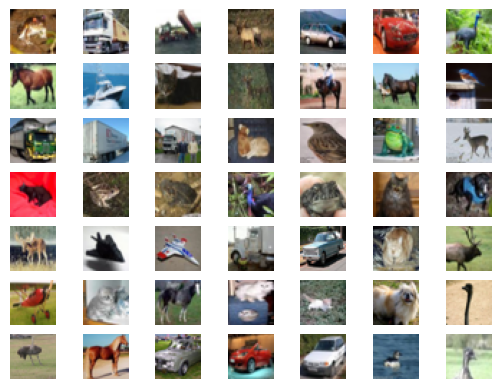

In [ ]:
# example of loading and plotting the cifarle dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
  #define subplot
  pyplot.subplot(7, 7, 1 + i)
  # turn off axis
  pyplot.axis('off')
  # plot raw pixel data
  pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
trainX.shape # images =50000 , resolution = 32 ,32 Here 3 = 3D represents(RGB) in the image.

(50000, 32, 32, 3)

In [ ]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [ ]:
# define the stadalone Discriminator model
def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

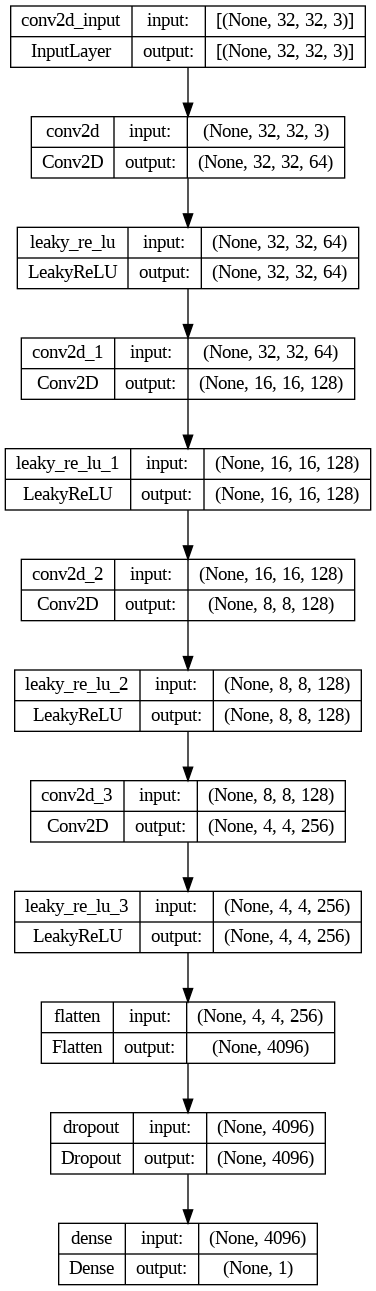

In [ ]:
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Function to load the dataset and scale it
def load_real_samples():
    # Load CIFAR-10 dataset
    (trainX, _), (_, _) = cifar10.load_data()

    # Convert from unsigned ints to floats
    X = trainX.astype('float32')

    # Scale from [0, 255] to [-1, 1]
    X = (X - 127.5) / 127.5

    return X

In [ ]:
from tensorflow.keras.datasets import cifar10

# Function to load the dataset and scale it
def load_real_samples():
    # Load CIFAR-10 dataset
    (trainX, trainY), (_, _) = cifar10.load_data()

    # Convert from unsigned ints to floats
    X = trainX.astype('float32')

    # Scale from [0, 255] to [-1, 1]
    X = (X - 127.5) / 127.5

    return X


In [ ]:
 X = load_real_samples()

In [ ]:
X.shape

(50000, 32, 32, 3)

In [ ]:
X[0] # every value is in 1, -1 range

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [ ]:
# Select real samples
def generate_real_samples(dataset, n_samples):
    # Choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)

    # Retrieve selected images
    X = dataset[ix]

    # Generate 'real' class labels (1)
    y = np.ones((n_samples, 1))

    return X, y
# Usage example ( REAL DATA)
# Usage example (REAL DATA)
X_real, y_real = generate_real_samples(X, 64)
print(X_real.shape)
print(y_real.shape)



(64, 32, 32, 3)
(64, 1)


In [ ]:
#generate n fake samples with class labels
def generate_fake_samples(n_samples):
    # Generate uniform random numbers in [0,1]
    X = np.random.rand(32 * 32 * 3 * n_samples)

    # Update to have the range [-1, 1]
    X = -1 + X * 2

    # Reshape into a batch of color images
    X = X.reshape((n_samples, 32, 32, 3))

    # Generate ndarray for class labels (0)
    y = np.zeros((n_samples, 1))

    return X, y

In [ ]:
# Usage example (REAL DATA)
X, y = generate_real_samples(X, 64)
X_real, y_real = X, y  # Unpack the tuple

print(X_real.shape)
print(y_real.shape)


(64, 32, 32, 3)
(64, 1)


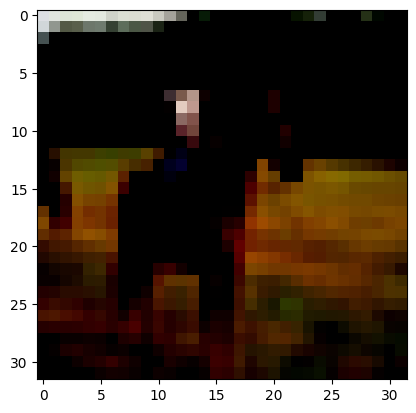

In [ ]:
pyplot.imshow(X[0])

In [ ]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch = int(n_batch / 2)

    # Manually enumerate epochs
    for i in range(n_iter):
        # Get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)

        # Update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)

        # Generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)

        # Update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)

        # Summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
# Example Training



In [ ]:
# define the discriminator model
model = define_discriminator()

# load image data
dataset = load_real_samples()

# fit the model
train_discriminator(model, dataset)

>1 real=6% fake=0%
>2 real=97% fake=3%
>3 real=94% fake=66%
>4 real=86% fake=98%
>5 real=98% fake=100%
>6 real=95% fake=100%
>7 real=98% fake=100%
>8 real=98% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=98% fake=100%
